In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rcParams.update({'font.size': 16})

In [118]:
df = pd.read_csv('data/raw_accelerometry_data/id00b70b13.csv')
df.head()

,activity,time_s,lw_x,lw_y,lw_z,lh_x,lh_y,lh_z,la_x,la_y,la_z,ra_x,ra_y,ra_z
0,99,0.01,0.039,1.020,-0.020,-0.180,1.234,0.023,0.156,0.855,-0.582,0.887,0.449,0.074
1,99,0.02,-0.629,-0.461,0.973,-0.246,0.137,0.969,-0.707,0.559,0.449,-0.027,0.141,0.934
2,99,0.03,-0.926,-1.262,0.691,0.238,-0.328,1.219,-1.445,1.367,0.367,-0.164,0.660,1.344
3,99,0.04,-0.871,-1.496,-0.246,0.711,-0.484,0.414,-1.660,1.645,-0.543,-0.141,1.027,0.707
4,99,0.05,-0.727,-1.621,-0.559,1.031,-0.297,0.145,-1.762,1.676,-0.918,-0.121,1.230,0.438


## Dataset description
I am using a PhysioNet dataset found here: https://physionet.org/content/accelerometry-walk-climb-drive/1.0.0/

The dataset contains accelerometer data collected from 32 participants. Each participant wore a 4 tri-axial ActiGraph GT3X wearable accelerometers located at the left ankle, right ankle, lip hip, and left wrist. Data was collected from multiple activities: walking, driving, clapping, descending stairs, and ascending stairs.

## First I will do a case study on a single subject

### 1. Preprocessing

In [119]:
df.sort_values(by='time_s', inplace=True, ascending=True)

In [120]:
mapping = {
    1: 'walking',
    2: 'descending stairs',
    3: 'ascending stairs',
    4: 'driving',
    77: 'clapping',
    99: 'non-study'
}

df.activity = df.activity.apply(lambda x: mapping[x])

In [121]:
# 99 is miscellanous mvmnt, drop it
df.drop(index=df.loc[df.activity == 'non-study'].index, inplace=True)

### 2. Exploration

In [122]:
print(f'Num recordings: {df.shape[0]}')
print()

Num recordings: 199412



Text(0.5, 1.0, 'Number of samples by activity')

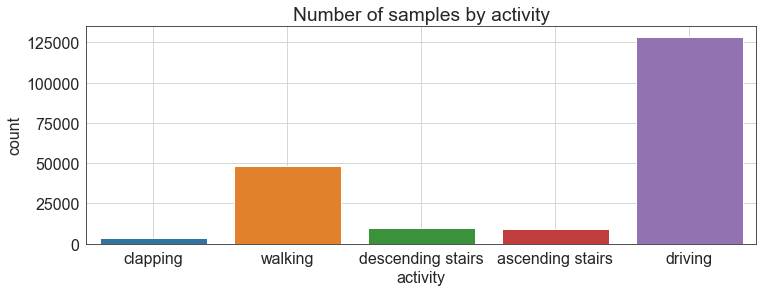

In [123]:
plt.figure(figsize = (12, 4))
sns.countplot(x='activity', data=df)
plt.grid()
plt.title('Number of samples by activity')

In [124]:
xs = ['lw_x', 'lh_x', 'la_x', 'ra_x']
ys = ['lw_y', 'lh_y', 'la_y', 'ra_y']
zs = ['lw_z', 'lh_z', 'la_z', 'ra_z']

labels = ['lw', 'lh', 'la', 'ra']

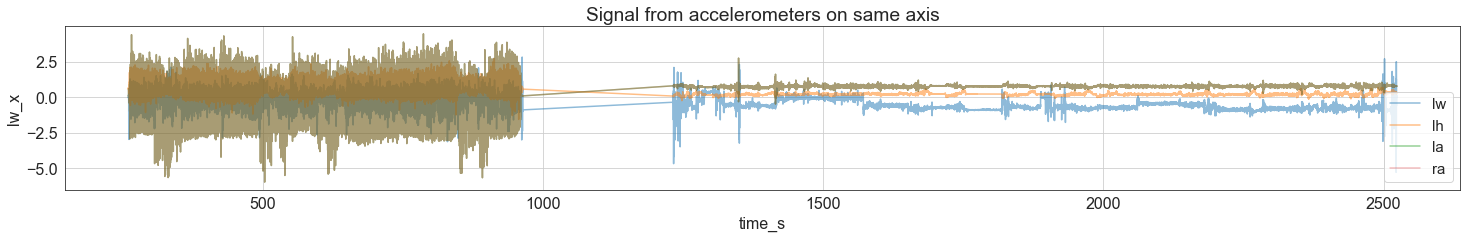

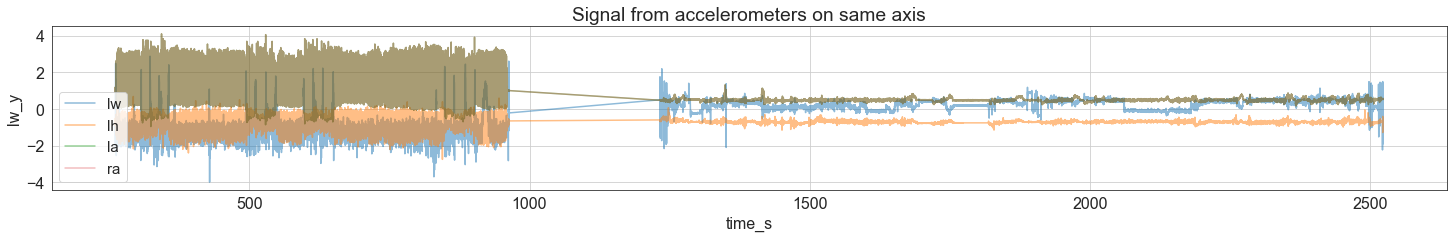

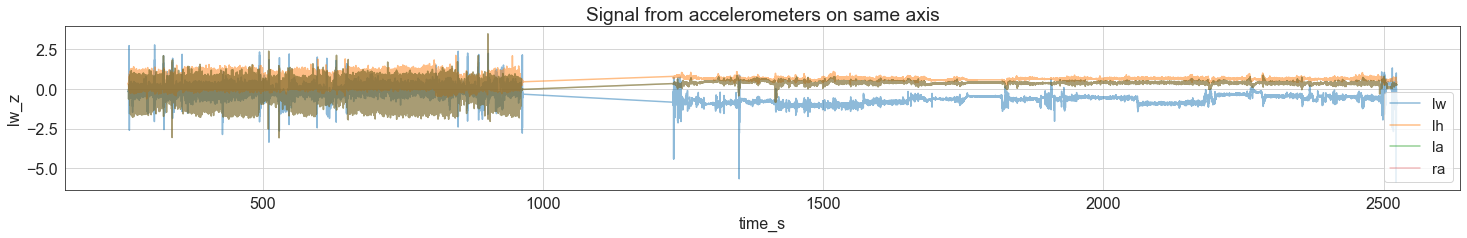

In [125]:
# compare time-series recordings by axis
for axs in [xs, ys, zs]:
    plt.figure(figsize=(20, 2))
    sns.lineplot(data=df, x='time_s', y=axs[0], label='lw', alpha=0.5)
    sns.lineplot(data=df, x='time_s', y=axs[1], label='lh', alpha=0.5)
    sns.lineplot(data=df, x='time_s', y=axs[2], label='la', alpha=0.5)
    sns.lineplot(data=df, x='time_s', y=axs[2], label='ra', alpha=0.3)
    
    plt.grid()
    plt.legend(fontsize='15')
    plt.title(f'Signal from accelerometers on same axis')

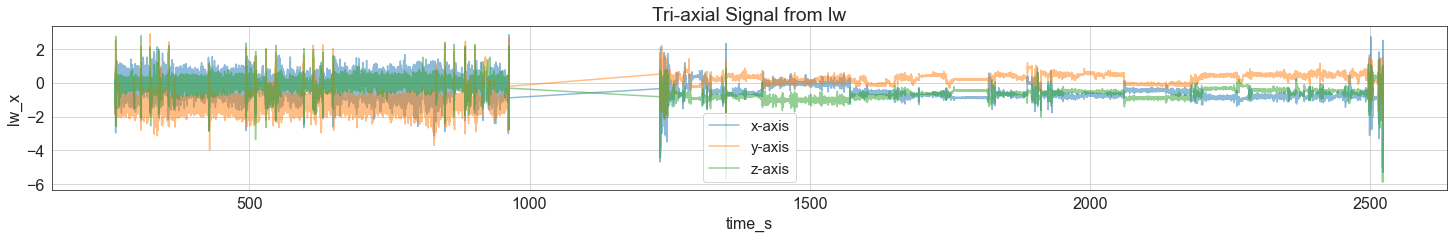

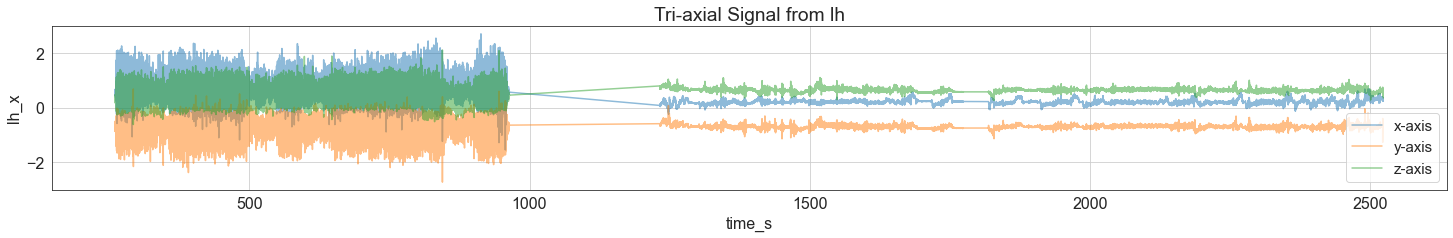

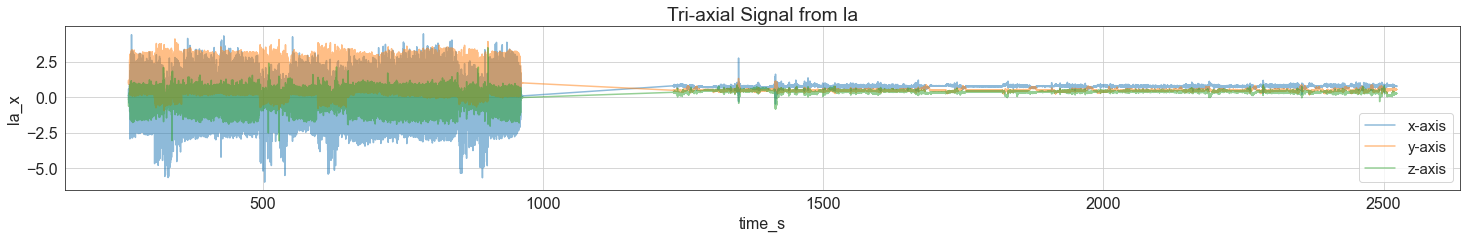

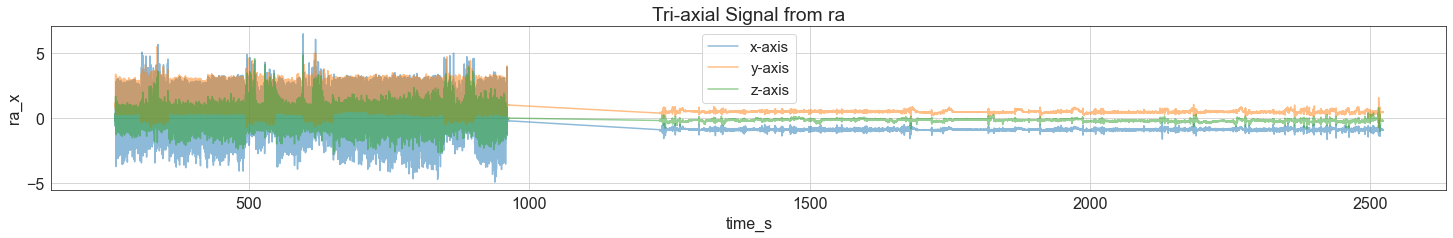

In [126]:
# Now plot within device data
# compare time-series recordings by axis
for lab in labels:
    plt.figure(figsize=(20, 2))
    sns.lineplot(data=df, x='time_s', y=df[lab + '_x'], label='x-axis', alpha=0.5)
    sns.lineplot(data=df, x='time_s', y=df[lab + '_y'], label='y-axis', alpha=0.5)
    sns.lineplot(data=df, x='time_s', y=df[lab + '_z'], label='z-axis', alpha=0.5)
    
    plt.grid()
    plt.legend(fontsize='15')
    plt.title(f'Tri-axial Signal from {lab}')

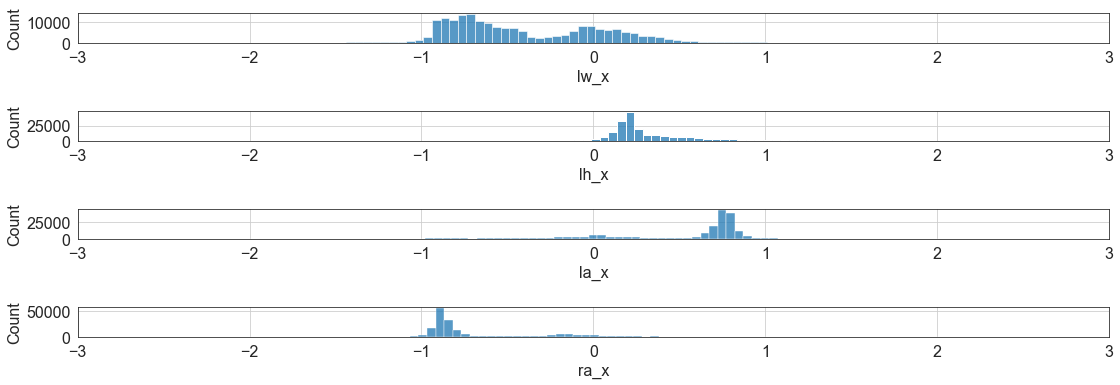

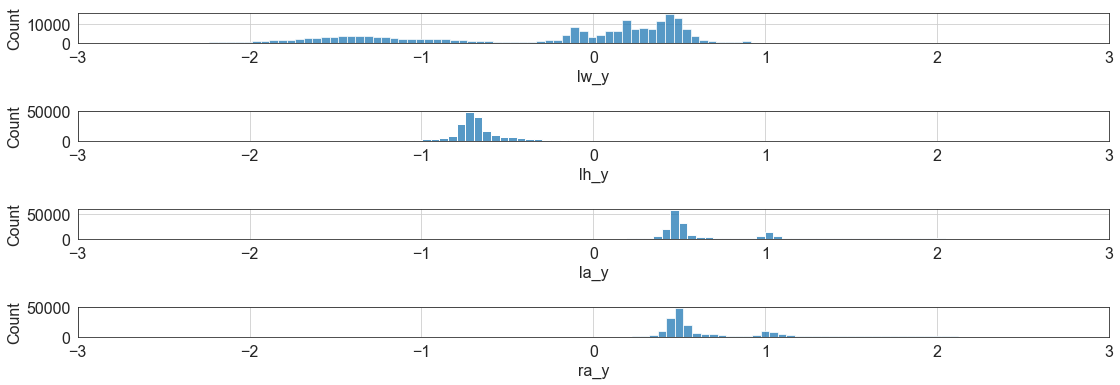

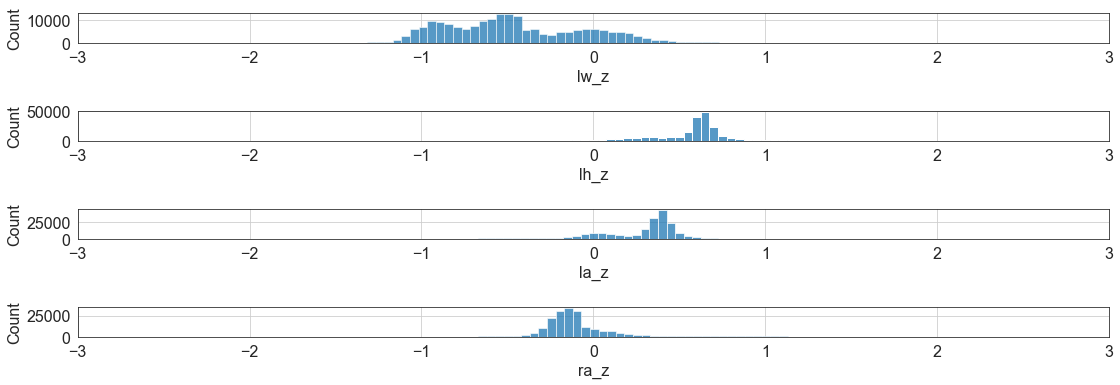

In [127]:
# compare distributions of values by axis
for axs in [xs, ys, zs]:
    f, axg = plt.subplots(4, 1, figsize=(16, 6))
    f.tight_layout(pad=2.5)#plt.subplots_adjust(hspace=0.8)
    g = sns.histplot(df[axs[0]], binwidth=0.05, ax=axg[0])
    #g.set_title(labels[0])
    g.set(xlim=(-3, 3))
    g.grid()
    
    g = sns.histplot(df[axs[1]], binwidth=0.05, ax=axg[1])
    #g.set_title(labels[1])
    g.set(xlim=(-3, 3))
    g.grid()
    
    g = sns.histplot(df[axs[2]], binwidth=0.05, ax=axg[2])
    #g.set_title(labels[2])
    g.set(xlim=(-3, 3))
    g.grid()
    
    g = sns.histplot(df[axs[3]], binwidth=0.05, ax=axg[3])
    #g.set_title(labels[3])
    g.set(xlim=(-3, 3))
    g.grid()
    #plt.title(f'Distribution of recordings')

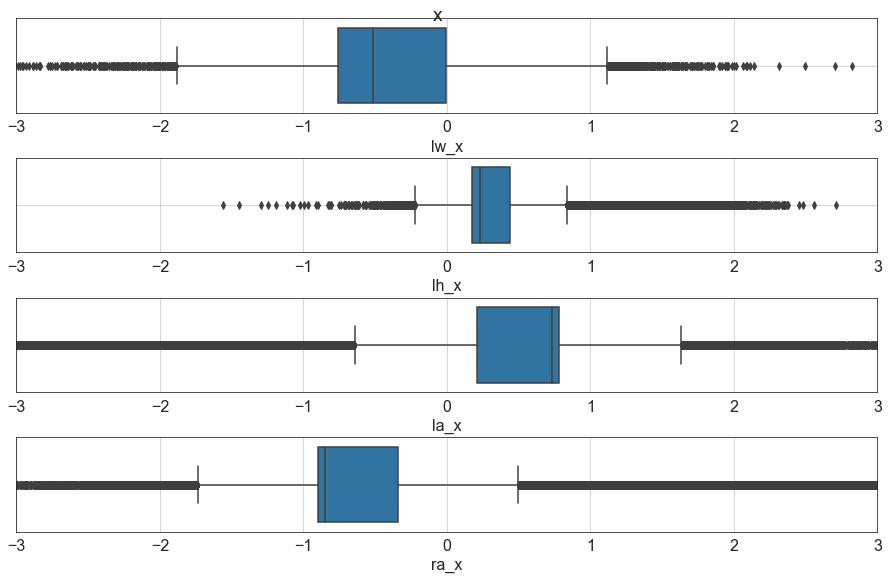

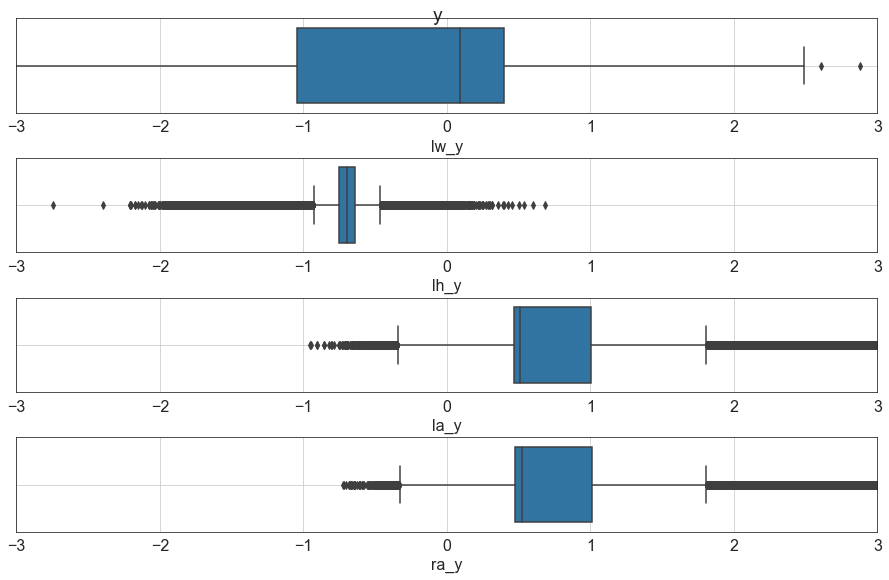

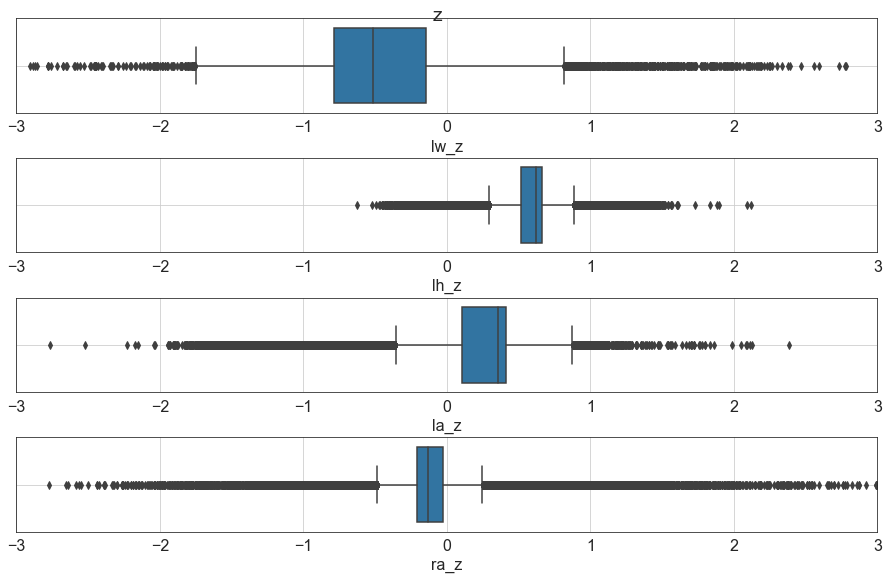

In [128]:
# also look at boxplots
for axs, l in zip([xs, ys, zs], ['x', 'y', 'z']):
    f, axg = plt.subplots(4, 1, figsize=(13, 8))
    f.tight_layout()
    plt.suptitle(l)
    
    g = sns.boxplot(x=df[axs[0]], ax=axg[0])
    g.set(xlim=(-3, 3))
    g.grid()
    
    g = sns.boxplot(x=df[axs[1]], ax=axg[1])
    g.set(xlim=(-3, 3))
    g.grid()
    
    g = sns.boxplot(x=df[axs[2]], ax=axg[2])
    g.set(xlim=(-3, 3))
    g.grid()
    
    g = sns.boxplot(x=df[axs[3]], ax=axg[3])
    g.set(xlim=(-3, 3))
    g.grid()

In [159]:
# missing data
print(f'NaN count: {df.isna().sum().sum()}')

NaN count: 0


In [152]:
def custom_format(ax, title, xlab=None, leg_loc='upper right'):
    
    ax.set_title(title)
    ax.set_xlabel(xlab)
    ax.grid()
    ax.legend(loc=leg_loc)

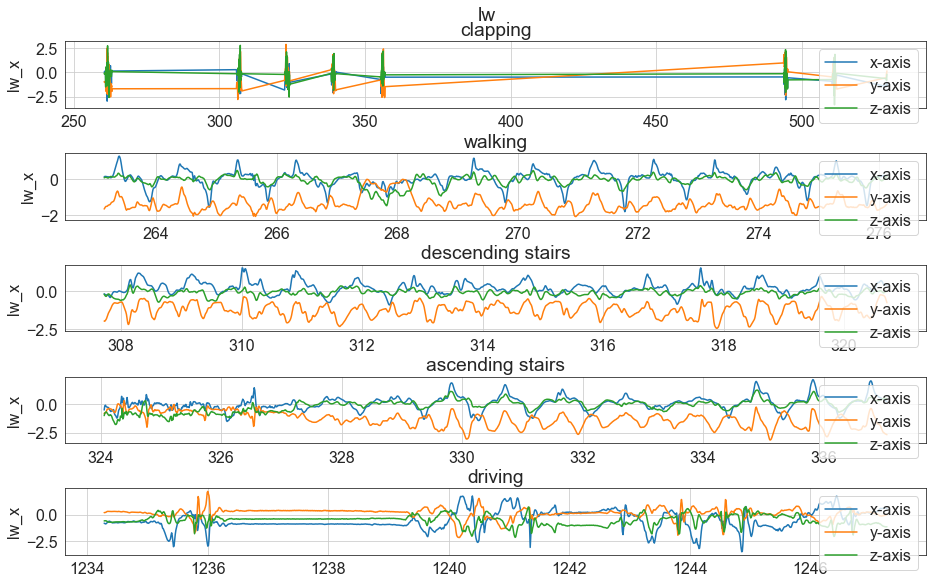

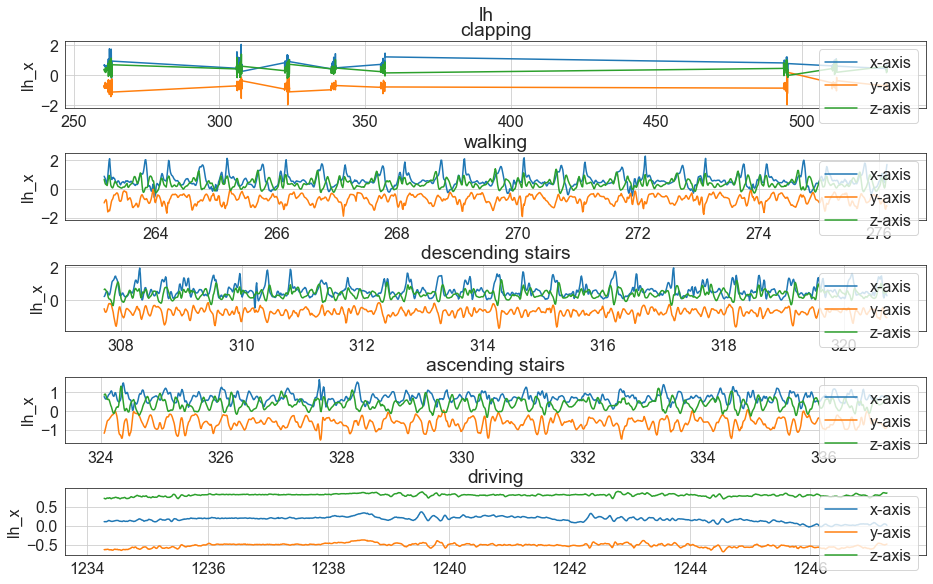

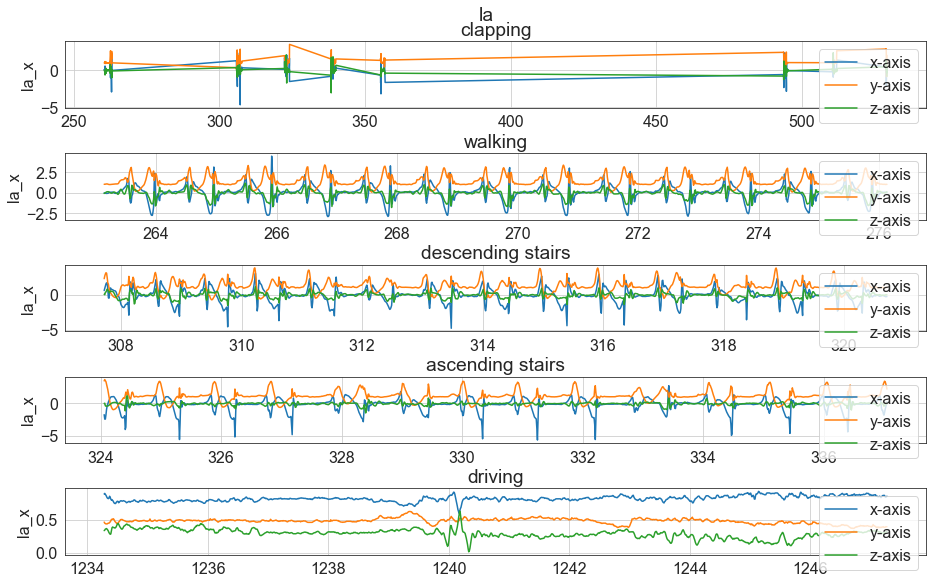

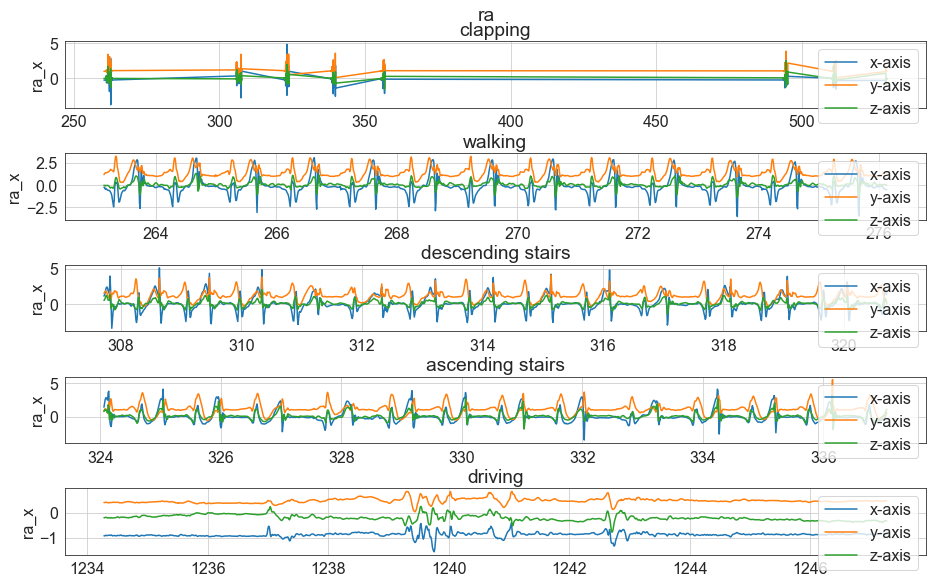

In [158]:
for lab in labels:
    f, axg = plt.subplots(5, 1, figsize=(13, 8))
    f.tight_layout()
    plt.suptitle(lab, y=1.02)
    
    for i, act in enumerate(df.activity.unique()):
        subset = df.loc[df.activity == act][0:1300]
        
        sns.lineplot(data=subset, x='time_s', y=df[lab + '_x'], label='x-axis', ax=axg[i])
        custom_format(axg[i], title=act, leg_loc='upper right')
      
        sns.lineplot(data=subset, x='time_s', y=df[lab + '_y'], label='y-axis', ax=axg[i])
        custom_format(axg[i], title=act, leg_loc='upper right')
        
        sns.lineplot(data=subset, x='time_s', y=df[lab + '_z'], label='z-axis', ax=axg[i])
        custom_format(axg[i], title=act, leg_loc='upper right')
        
        